# Eda Datos originales

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# para inferir sex

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [129]:
df = pd.read_csv('german.data', delim_whitespace=True, header=None)


In [131]:
# Define column names according to dataset documentation
columns = [
    "checking_account_status", "duration_months", "credit_history", "purpose",
    "credit_amount", "savings_account_bonds", "employment_since",
    "installment_rate_pct", "personal_status_sex", "other_debtors_guarantors",
    "residence_since", "property", "age", "other_installment_plans", "housing",
    "existing_credits", "job", "dependents", "telephone", "foreign_worker",
    "target"
]

# Assign column names
df.columns = columns

# Map target values: 1 = Good, 2 = Bad
df["target"] = df["target"].map({1: "Good", 2: "Bad"})

# Preview first few rows
df.head()

,checking_account_status,duration_months,credit_history,purpose,credit_amount,savings_account_bonds,employment_since,installment_rate_pct,personal_status_sex,other_debtors_guarantors,...,property,age,other_installment_plans,housing,existing_credits,job,dependents,telephone,foreign_worker,target
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,Good
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,Bad
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,Good
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,Good
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,Bad


In [133]:

print("Shape of the dataset:", df.shape)
print("\nData types:")
print(df.dtypes)

print("\nClass distribution:")
print(df["target"].value_counts(normalize=True))

df.describe()


Shape of the dataset: (1000, 21)

Data types:
checking_account_status     object
duration_months              int64
credit_history              object
purpose                     object
credit_amount                int64
savings_account_bonds       object
employment_since            object
installment_rate_pct         int64
personal_status_sex         object
other_debtors_guarantors    object
residence_since              int64
property                    object
age                          int64
other_installment_plans     object
housing                     object
existing_credits             int64
job                         object
dependents                   int64
telephone                   object
foreign_worker              object
target                      object
dtype: object

Class distribution:
target
Good    0.7
Bad     0.3
Name: proportion, dtype: float64


,duration_months,credit_amount,installment_rate_pct,residence_since,age,existing_credits,dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


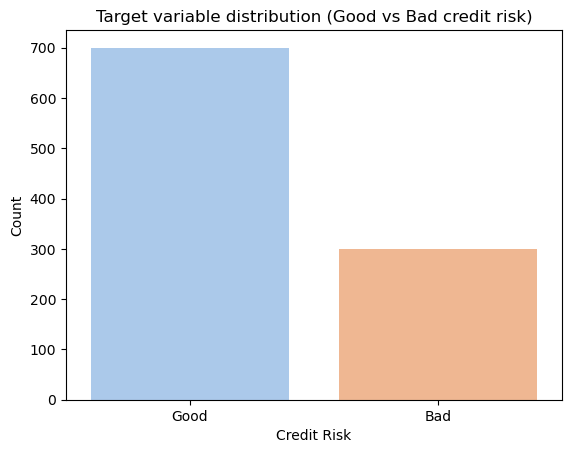

In [135]:
sns.countplot(data=df, x="target", palette="pastel")
plt.title("Target variable distribution (Good vs Bad credit risk)")
plt.xlabel("Credit Risk")
plt.ylabel("Count")
plt.show()

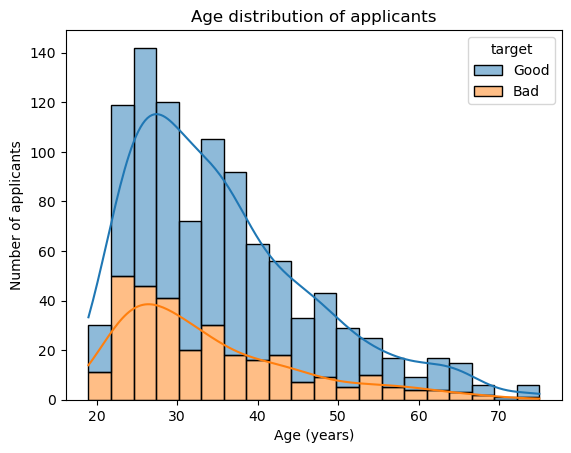

In [137]:
#visualizacion de distribucion de edad (age)
sns.histplot(data=df, x="age", bins=20, kde=True, color="cornflowerblue", hue="target", multiple="stack")
plt.title("Age distribution of applicants")
plt.xlabel("Age (years)")
plt.ylabel("Number of applicants")
plt.show()

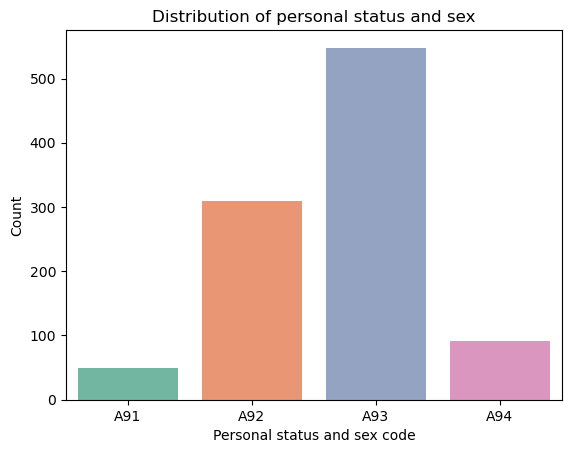

In [139]:
# Count frequency of each category in personal_status_sex
sns.countplot(data=df, x="personal_status_sex", order=sorted(df["personal_status_sex"].unique()), palette="Set2")
plt.title("Distribution of personal status and sex")
plt.xlabel("Personal status and sex code")
plt.ylabel("Count")
plt.show()


**Observación**: La variable `personal_status_sex` codifica género y estado civil. A continuación se detallan los códigos:

| Código | Significado                         |
|--------|-------------------------------------|
| A91    | Hombre, divorciado/separado         |
| A92    | Mujer, divorciada/separada/casada   |
| A93    | Hombre, soltero                     |
| A94    | Hombre, casado/viudo                |
| A95    | Mujer, soltera                      |

Esta tabla de códigos está mal segun *[este paper](https://archive.ics.uci.edu/ml/datasets/South+German+Credit)*


Más abajo le echamos un ojo con los datos corregidos por los autores del mismo



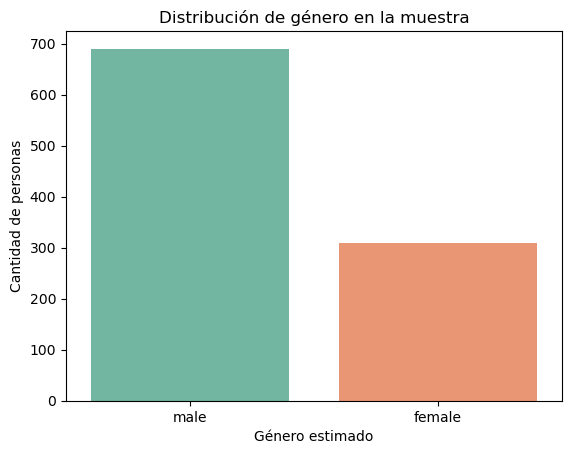

In [142]:
# Map personal_status_sex to gender
df["gender"] = df["personal_status_sex"].map({
    "A91": "male", "A92": "female", "A93": "male", "A94": "male", "A95": "female"
})

# Plot gender distribution
sns.countplot(data=df, x="gender", palette="Set2")
plt.title("Distribución de género en la muestra")
plt.xlabel("Género estimado")
plt.ylabel("Cantidad de personas")
plt.show()


**Observación**: El conjunto de datos presenta una mayor cantidad de personas identificadas como hombres. Esta desproporción debe tenerse en cuenta al evaluar equidad, ya que puede influir en la performance de los modelos.

### Aprobación de crédito según género estimado

Analizamos la variable `target` (buen/mal riesgo crediticio) desagregada por género. Esto permite observar si hay diferencias visibles en las decisiones de aprobación entre hombres y mujeres.

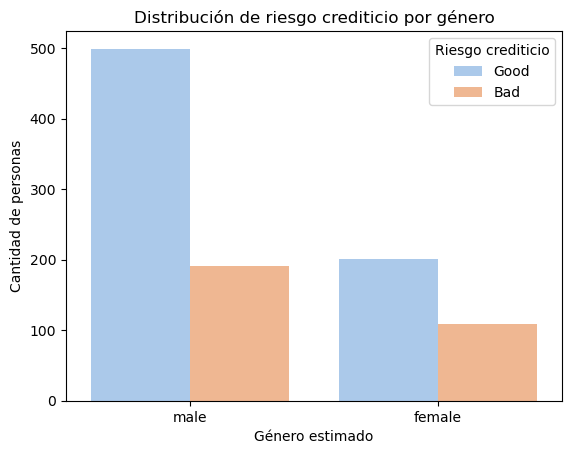

In [145]:
sns.countplot(data=df, x="gender", hue="target", palette="pastel")
plt.title("Distribución de riesgo crediticio por género")
plt.xlabel("Género estimado")
plt.ylabel("Cantidad de personas")
plt.legend(title="Riesgo crediticio", loc="upper right")
plt.show()

**Observación**: Visualmente, parece que tanto hombres como mujeres reciben en su mayoría una calificación de "buen riesgo". Sin embargo, para evaluar posibles sesgos es necesario comparar proporciones relativas entre géneros.

### Proporción de aprobación crediticia por género

Para analizar posibles sesgos en las decisiones crediticias, calculamos qué porcentaje de personas de cada género fueron clasificadas como "buen riesgo crediticio".


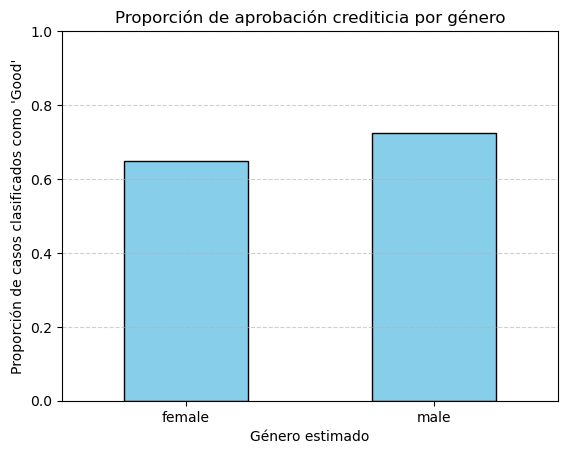

In [40]:
# Calculate proportion of 'Good' outcomes within each gender
approval_rate = df.groupby("gender")["target"].value_counts(normalize=True).unstack()

# Plot proportions
approval_rate["Good"].plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Proporción de aprobación crediticia por género")
plt.xlabel("Género estimado")
plt.ylabel("Proporción de casos clasificados como 'Good'")
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

**Observación**: La proporción de personas clasificadas como "buen riesgo" es ligeramente mayor en hombres que en mujeres. Si bien la diferencia no es extrema, podría indicar un sesgo sutil que merece ser evaluado con métricas de equidad más precisas.


In [45]:
df = pd.read_csv("SouthGermanCredit.csv")
df= df.rename(columns={"credit_risk" : "target"})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   status                   1000 non-null   object
 1   duration                 1000 non-null   int64 
 2   credit_history           1000 non-null   object
 3   purpose                  1000 non-null   object
 4   amount                   1000 non-null   int64 
 5   savings                  1000 non-null   object
 6   employment_duration      1000 non-null   object
 7   installment_rate         1000 non-null   object
 8   personal_status_sex      1000 non-null   object
 9   other_debtors            1000 non-null   object
 10  present_residence        1000 non-null   object
 11  property                 1000 non-null   object
 12  age                      1000 non-null   int64 
 13  other_installment_plans  1000 non-null   object
 14  housing                  1000 non-null   

# 02 - Modelo Inicial


## Objetivo
Entrenar un modelo de clasificación sobre el dataset *German Credit Data* y evaluar su rendimiento con métricas como accuracy, precision, recall y F1-score. Además, se analizará cuál error es más costoso para el banco.

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from holisticai.bias.mitigation import Reweighing
from holisticai.pipeline import Pipeline as HolPipeline
from holisticai.bias.mitigation import CorrelationRemover
from holisticai.bias.mitigation import PrejudiceRemover
from holisticai.bias.metrics import classification_bias_metrics

## Carga de datos

In [50]:

df = pd.read_csv("south_german_credit_clean.csv")

df.head()


,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,other_debtors,present_residence,...,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,target,sex,personal_status
0,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,none,1 <= ... < 4 yrs,...,none,for free,2-3,skilled employee/official,3 or more,no,no,good,male,non-single
1,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,none,1 <= ... < 4 yrs,...,none,for free,2-3,unskilled - resident,3 or more,no,yes,good,male,non-single
2,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,none,>= 7 yrs,...,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good,male,non-single
3,no checking account,10,all credits at this bank paid back duly,others,2241,unknown/no savings account,< 1 yr,>= 35,none,4 <= ... < 7 yrs,...,none,for free,2-3,unskilled - resident,3 or more,no,yes,good,male,non-single
4,no checking account,8,all credits at this bank paid back duly,others,3398,unknown/no savings account,4 <= ... < 7 yrs,>= 35,none,>= 7 yrs,...,none,rent,2-3,unskilled - resident,0 to 2,no,yes,good,male,non-single


## Modelo baseline

Vamos a entrenar un *Árbol de Decisión* porque es fácil de entender y nos parece adecuado para un primer modelo.

Por el desbalance de clases, conviene usar SMOTE y de paso podemos armar un pipeline para buscar buenos parámetros con Grid Search y validación cruzada.

In [123]:
# Separar features y target
X = df.drop(columns=["target"])
y = df["target"].map({"good": 1, "bad": 0})  # good = positivo (1), bad = negativo (0)

# Codificar variables categóricas
X = pd.get_dummies(X, drop_first=True)

# Dividir en train/test (30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

pipeline = ImbPipeline([
    ("smote", SMOTE(random_state=42)),
    ("scaler", StandardScaler()),  
    ("clf", DecisionTreeClassifier(random_state=42))
])

param_grid = {
    "clf__max_depth": [3, 5, 10, None],
    "clf__min_samples_split": [2, 5, 10],
    "clf__min_samples_leaf": [1, 2, 5],
    "clf__criterion": ["gini", "entropy"]
}
grid_search = GridSearchCV(
    pipeline, param_grid, scoring="f1", cv=5, n_jobs=-1
)
grid_search.fit(X_train, y_train)
y_pred = grid_search.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=["bad (0)", "good (1)"])
best_params = grid_search.best_params_

Mejores hiperparámetros encontrados por GridSearch:
  clf__criterion: gini
  clf__max_depth: 10
  clf__min_samples_leaf: 5
  clf__min_samples_split: 2

Reporte de clasificación en test:
              precision    recall  f1-score   support

     bad (0)       0.45      0.49      0.47        90
    good (1)       0.77      0.74      0.76       210

    accuracy                           0.67       300
   macro avg       0.61      0.62      0.61       300
weighted avg       0.68      0.67      0.67       300



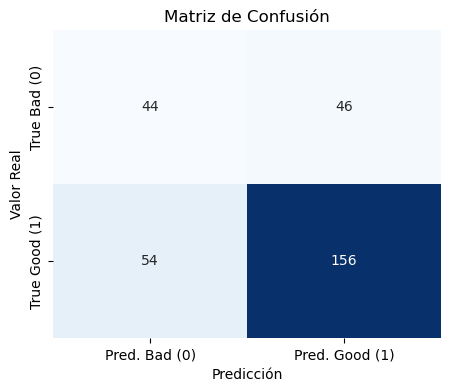

In [121]:

print("Mejores hiperparámetros encontrados por GridSearch:")
for k, v in best_params.items():
    print(f"  {k}: {v}")
print("\nReporte de clasificación en test:")
print(class_report)
plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Pred. Bad (0)", "Pred. Good (1)"],
            yticklabels=["True Bad (0)", "True Good (1)"])
plt.title("Matriz de Confusión")
plt.ylabel("Valor Real")
plt.xlabel("Predicción")
plt.show()

## Análisis de errores y trade-off

En el contexto bancario, donde el objetivo es **maximizar los préstamos otorgados a personas que efectivamente los van a pagar**, el **falso positivo** (darle un préstamo a alguien que no lo va a pagar) puede representar una **pérdida financiera** significativa.

En cambio, un **falso negativo** (negarle un préstamo a alguien que sí lo iba a pagar) implica una oportunidad perdida, pero no un costo directo. Por eso, **los falsos positivos son el error más costoso** en este escenario.

Esto debería reflejarse en el umbral de decisión y posiblemente en la elección de métricas (por ejemplo, priorizar un FPR bajo).


# 03 - Evaluación de equidad del modelo inicial


## Descripcion de las metricas de fairness vistas en clase para este contexto

1)Statistical Parity:
La proporcion de creditos aprobados de ambos grupos analizados debe ser estar dentro de nuestro criterio de comparacion.
Independientemente de la proporcion de buenos pagadores en ambos grupos, la prediccion positiva deberia ser la misma.

2)Equalized Odds:
La tasa de TPR y FPR debe ser la misma en ambos grupos.Es decir que el modelo se equivoca y acierta en la misma proporcion para ambos grupos, con respecto a la aprobacion
de creditos en ambos grupos.

3)Equal Opportunity:
El modelo se asegura de que en solo el caso de quienes si pagarian el prestamo, sea igual la proporcion de aprobados crediticiamente para los dos grupos.

4)Predictive Parity:
Se busca que la calidad de aprobaciones sea equitativa para ambos grupos.

## Analisis de fairness en el modelo anterior

 El umbral que nosotros proponemos para la diferencia del modulo entre las metricas de ambos grupos es el del 0.08 (8%)

## Obtencion de las metricas

### con Holistic Ai:

In [65]:
from holisticai.bias.metrics import classification_bias_metrics

df_eval = X_test.copy()
df_eval["y_true"] = y_test
df_eval["y_pred"] = y_pred
# Para el modelo base (sin mitigación)
metrics_base = classification_bias_metrics(
    df_eval["sex_male"] == True,
    df_eval["sex_male"] == False,
    y_pred,
    y_test,
    metric_type="both"
)

print("Métricas de fairness (modelo base):")
print(metrics_base)

Métricas de fairness (modelo base):
                                       Value  Reference
Metric                                                 
Statistical Parity                 -0.018301          0
Disparate Impact                    0.973435          1
Four Fifths Rule                    0.973435          1
Cohen D                            -0.039023          0
2SD Rule                           -0.241332          0
Equality of Opportunity Difference -0.098304          0
False Positive Rate Difference      0.089527          0
Average Odds Difference            -0.004389          0
Accuracy Difference                -0.078431          0


In [69]:
male_df = df_eval[df_eval["sex_male"] == True]
female_df = df_eval[df_eval["sex_male"] == False]

In [66]:
def matriz_confusion_clase(df):
    cm1 = confusion_matrix(df["y_true"], df["y_pred"], labels=[0, 1])
    
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues', 
                xticklabels=["Pred no aprobado", "Pred aprobado"], 
                yticklabels=["Real no aprobado", "Real aprobado"])
    
    plt.xlabel("Predicción")
    plt.ylabel("Valor real")
    plt.title("Matriz de Confusión")
    plt.tight_layout()
    plt.show()

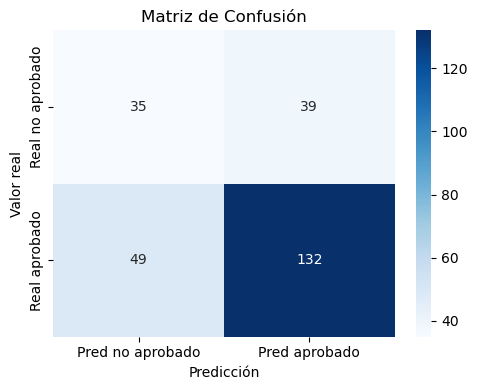

In [71]:
matriz_confusion_clase(male_df)

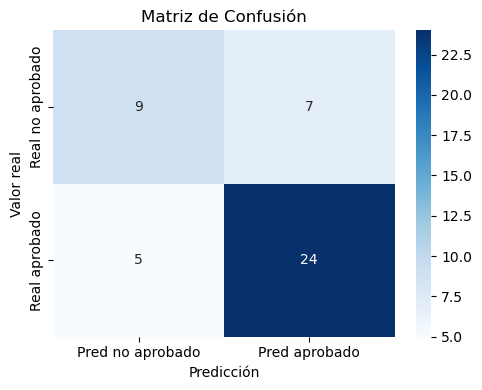

In [73]:
matriz_confusion_clase(female_df)

## Conclusiones de los resultados de las metricas

Cumple `Statistical Parity`, `Predictive Parity`, pero tiene una diferencia de `FPR` alta y no cumple `Equal Opportunity` (por ende tampoco `Equalized Odds`)

## Elección del criterio de fairness

Nosotros elegimos el criterio de `Equalized Odds` debido a que como personal del banco tenemos que encontrar un balance que no perjudique a los clientes pero tampoco a nuestra institucion:

Los clientes que si pagarán son aprobados en las mismas probabilidades entre hombres y mujeres.
Mientras que los que no pagarian, son rechazados en la misma probabilidad para los dos grupos. Esta medida haria el modelo mas confiable desde una perspectiva bancaria.

# 04 - Modelos con Mitigación de Sesgos

## *Funcion de plots y métricas*

In [119]:
def mostrar_metricas_y_matriz_confusion(y_true, y_pred, group_a, group_b, nombre_modelo="Modelo"):


    metrics = classification_bias_metrics(
        group_a,
        group_b,
        y_pred,
        y_true,
        metric_type='both'
    )
    print(f"Métricas de fairness ({nombre_modelo}):")
    print(metrics)

    cm = confusion_matrix(y_true, y_pred, labels=[0, 1])
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=["bad", "good"],
                yticklabels=["bad", "good"])
    plt.xlabel("Predicción")
    plt.ylabel("Valor real")
    plt.title(f"Matriz de Confusión - {nombre_modelo}")
    plt.tight_layout()
    plt.show()

    class_report = classification_report(y_true, y_pred, target_names=["bad (0)", "good (1)"])
    print("\nReporte de clasificación:")
    print(class_report)

## Pre-processing

### Reweighting

Comparar p esperado y el observado

In [80]:
print(f"P Esperado: ",((X_train['sex_male']==False).sum()/len(X_train))*((pd.DataFrame(y_train)["target"]==1).sum()/len(y_train)))

P Esperado:  0.11699999999999999


In [82]:
acum=0
for index in X_train.index.to_list():
  if pd.DataFrame(y_train)["target"].loc[index]==1 and X_train["sex_male"].loc[index]==False:
    acum+=1
print(f"P Observado: ",acum/len(X_train))

P Observado:  0.11


Aplicamos el mitigador

In [84]:
mitigador_w = Reweighing()
modelo_w=DecisionTreeClassifier(criterion="gini", max_depth=10, min_samples_leaf=5, min_samples_split=2, random_state=42)
pipeline_W = HolPipeline(steps=[("bm_preprocessing", mitigador_w), ("estimator", modelo_w),])
pipeline_W.fit(X_train,y_train, bm__group_a=X_train["sex_male"], bm__group_b=~X_train["sex_male"])
y_pred_weight = pipeline_W.predict(X_test, bm__group_a=X_test["sex_male"], bm__group_b=~X_test["sex_male"])


Calculamos metricas

Métricas de fairness (Modelo con Reweighing):
                                       Value  Reference
Metric                                                 
Statistical Parity                  0.001307          0
Disparate Impact                    1.001898          1
Four Fifths Rule                    0.998106          1
Cohen D                             0.002826          0
2SD Rule                            0.017480          0
Equality of Opportunity Difference  0.094875          0
False Positive Rate Difference     -0.228041          0
Average Odds Difference            -0.066583          0
Accuracy Difference                 0.158170          0


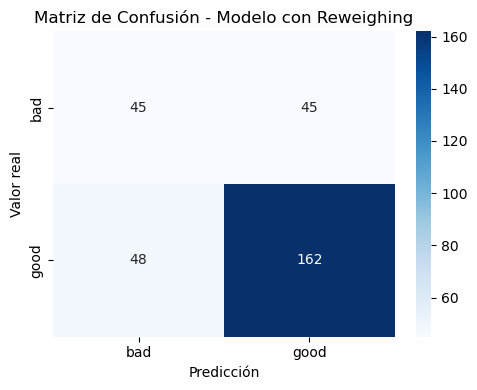


Reporte de clasificación:
              precision    recall  f1-score   support

     bad (0)       0.48      0.50      0.49        90
    good (1)       0.78      0.77      0.78       210

    accuracy                           0.69       300
   macro avg       0.63      0.64      0.63       300
weighted avg       0.69      0.69      0.69       300



In [87]:
mostrar_metricas_y_matriz_confusion(y_test, y_pred_weight, X_test['sex_male'], ~X_test['sex_male'], nombre_modelo="Modelo con Reweighing")

### Correlation remover

Buscamos correlaciones

C:\Users\marti\AppData\Local\Temp\ipykernel_18896\257248036.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_num["sex"] = df["sex"].map({"male": 1, "female": 0})


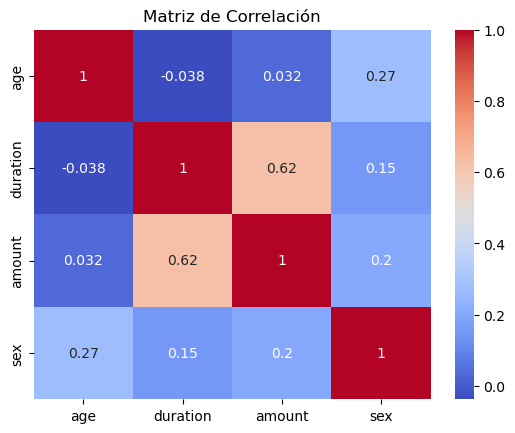

In [91]:
X_num=df[["age","duration","amount","sex"]]
X_num["sex"] = df["sex"].map({"male": 1, "female": 0})

corr = X_num.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Matriz de Correlación")
plt.show()


In [93]:
mitigador_cr = CorrelationRemover()
modelo_cr=DecisionTreeClassifier(criterion="gini", max_depth=10, min_samples_leaf=5, min_samples_split=2, random_state=42)
pipeline_cr = HolPipeline(steps=[("bm_preprocessing", mitigador_cr), ("estimator", modelo_cr),])
pipeline_cr.fit(X_train[["age","duration","amount"]],y_train, bm__group_a=X_train["sex_male"], bm__group_b=~X_train["sex_male"])
y_pred_cr = pipeline_cr.predict(X_test[["age","duration","amount"]], bm__group_a=X_test["sex_male"], bm__group_b=~X_test["sex_male"])

Métricas de fairness (Modelo con Correlation Remover):
                                       Value  Reference
Metric                                                 
Statistical Parity                  0.000000          0
Disparate Impact                    1.000000          1
Four Fifths Rule                    1.000000          1
Cohen D                             0.000000          0
2SD Rule                            0.000000          0
Equality of Opportunity Difference  0.071442          0
False Positive Rate Difference     -0.168919          0
Average Odds Difference            -0.048738          0
Accuracy Difference                 0.130719          0


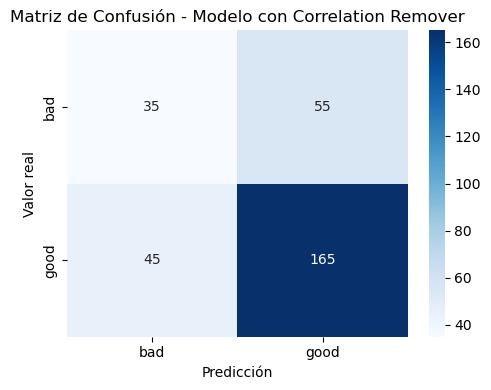


Reporte de clasificación:
              precision    recall  f1-score   support

     bad (0)       0.44      0.39      0.41        90
    good (1)       0.75      0.79      0.77       210

    accuracy                           0.67       300
   macro avg       0.59      0.59      0.59       300
weighted avg       0.66      0.67      0.66       300



In [95]:
mostrar_metricas_y_matriz_confusion(y_test, y_pred_cr, X_test['sex_male'], ~X_test['sex_male'], nombre_modelo="Modelo con Correlation Remover")

Mejoró bastante el Equal Opportunity, ahora está dentro del umbral. Sin embargo el FPRD todavía es peor que el baseline

## In-processing

### Prejudice Remover

Vamos con un modelo con mitigacion in-processing. Para esto introducimos Prejudice Remover pero esta vez tenemos que aplicarlo en un regresor logístico por la naturaleza de este método de mitigación:

Baseline logistic regression:

In [103]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

logreg_pipeline = make_pipeline(
    StandardScaler(),
    LogisticRegression(random_state=42, max_iter=3000, solver='lbfgs')  # puedes probar 'saga' si sigue sin converger
)

logreg_pipeline.fit(X_train, y_train)

y_pred_logreg = logreg_pipeline.predict(X_test)

metrics_inprocessing_lr = classification_bias_metrics(
    group_a=X_test["sex_male"], 
    group_b=~X_test["sex_male"], 
    y_pred=y_pred_logreg, 
    y_true=y_test, 
    metric_type="both"
)

print(metrics_inprocessing_lr)


                                       Value  Reference
Metric                                                 
Statistical Parity                  0.033987          0
Disparate Impact                    1.047794          1
Four Fifths Rule                    0.954386          1
Cohen D                             0.077521          0
2SD Rule                            0.479209          0
Equality of Opportunity Difference -0.067822          0
False Positive Rate Difference      0.165541          0
Average Odds Difference             0.048859          0
Accuracy Difference                -0.078431          0


Prejudice Remover:

[elapsed time: 00:00:00 | iter:17/100 | loss:283.6373]
[elapsed time: 00:00:00 | Best Loss : 283.6373]
Métricas de fairness (Modelo con Prejudice Remover):
                                       Value  Reference
Metric                                                 
Statistical Parity                  0.026144          0
Disparate Impact                    1.036765          1
Four Fifths Rule                    0.964539          1
Cohen D                             0.059137          0
2SD Rule                            0.365636          0
Equality of Opportunity Difference  0.104591          0
False Positive Rate Difference     -0.173986          0
Average Odds Difference            -0.034698          0
Accuracy Difference                 0.151634          0


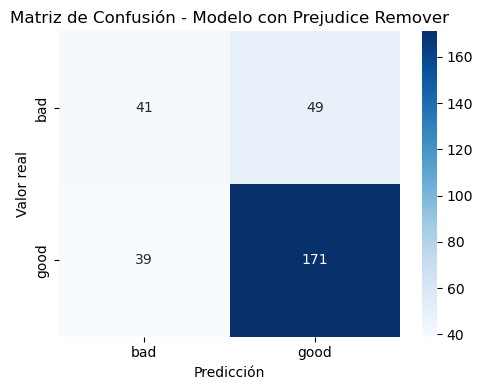


Reporte de clasificación:
              precision    recall  f1-score   support

     bad (0)       0.51      0.46      0.48        90
    good (1)       0.78      0.81      0.80       210

    accuracy                           0.71       300
   macro avg       0.64      0.63      0.64       300
weighted avg       0.70      0.71      0.70       300



In [115]:
import warnings
from sklearn.linear_model import LogisticRegression
warnings.filterwarnings('ignore')
modelo_pr = LogisticRegression()
mitigator = PrejudiceRemover(maxiter=100, fit_intercept=True, verbose=1, print_interval=1).transform_estimator(modelo_pr)

pipeline_pr = HolPipeline(steps=[('scalar', StandardScaler()), ('bm_inprocessing', mitigator)])
pipeline_pr.fit(X_train,y_train, bm__group_a=X_train["sex_male"], bm__group_b=~X_train["sex_male"])
y_pred_pipeline_pr = pipeline_pr.predict(X_test, bm__group_a=X_test["sex_male"], bm__group_b=~X_test["sex_male"])
mostrar_metricas_y_matriz_confusion(y_test, y_pred_pipeline_pr, X_test['sex_male'], ~X_test['sex_male'], nombre_modelo="Modelo con Prejudice Remover")

Nos da peores métricas que el baseline si nos fijamos solo en Equalized Odds

## Post-processing

### MLDebiaser

[elapsed time: 00:00:00 | iter:2/2]
Métricas de fairness (Modelo con mldebiaser):
                                       Value  Reference
Metric                                                 
Statistical Parity                 -0.035294          0
Disparate Impact                    0.951872          1
Four Fifths Rule                    0.951872          1
Cohen D                            -0.077289          0
2SD Rule                           -0.477863          0
Equality of Opportunity Difference -0.003048          0
False Positive Rate Difference     -0.152027          0
Average Odds Difference            -0.077538          0
Accuracy Difference                 0.069281          0


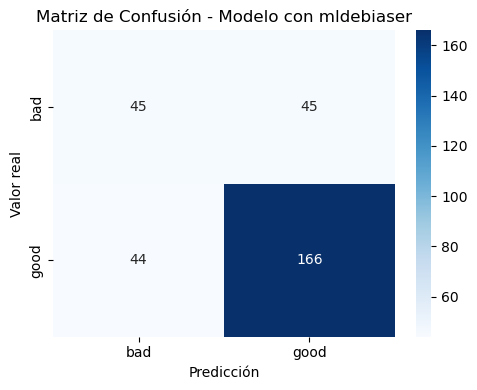


Reporte de clasificación:
              precision    recall  f1-score   support

     bad (0)       0.51      0.50      0.50        90
    good (1)       0.79      0.79      0.79       210

    accuracy                           0.70       300
   macro avg       0.65      0.65      0.65       300
weighted avg       0.70      0.70      0.70       300



In [111]:
from holisticai.bias.mitigation import MLDebiaser
mitigator = MLDebiaser()
model = DecisionTreeClassifier(criterion="gini", max_depth=10, min_samples_leaf=5, min_samples_split=2, random_state=42)
pipeline_ml_debiaser = HolPipeline(steps=[
    ('scalar', StandardScaler()),
    ("estimator", model),
    ("bm_posprocessing", mitigator)
])
pipeline_ml_debiaser.fit(
    X_train, y_train,
    bm__group_a=X_train["sex_male"],
    bm__group_b=~X_train["sex_male"]
)
y_pred_ml_debiaser = pipeline_ml_debiaser.predict(
    X_test,
    bm__group_a=X_test["sex_male"],
    bm__group_b=~X_test["sex_male"]
)
mostrar_metricas_y_matriz_confusion(y_test, y_pred_ml_debiaser, X_test['sex_male'], ~X_test['sex_male'], nombre_modelo="Modelo con mldebiaser")

Con este último el Equal Opportunity quedó excelente, pero el FPRD sigue siendo peor que el baseline

# 05 - Conclusiones

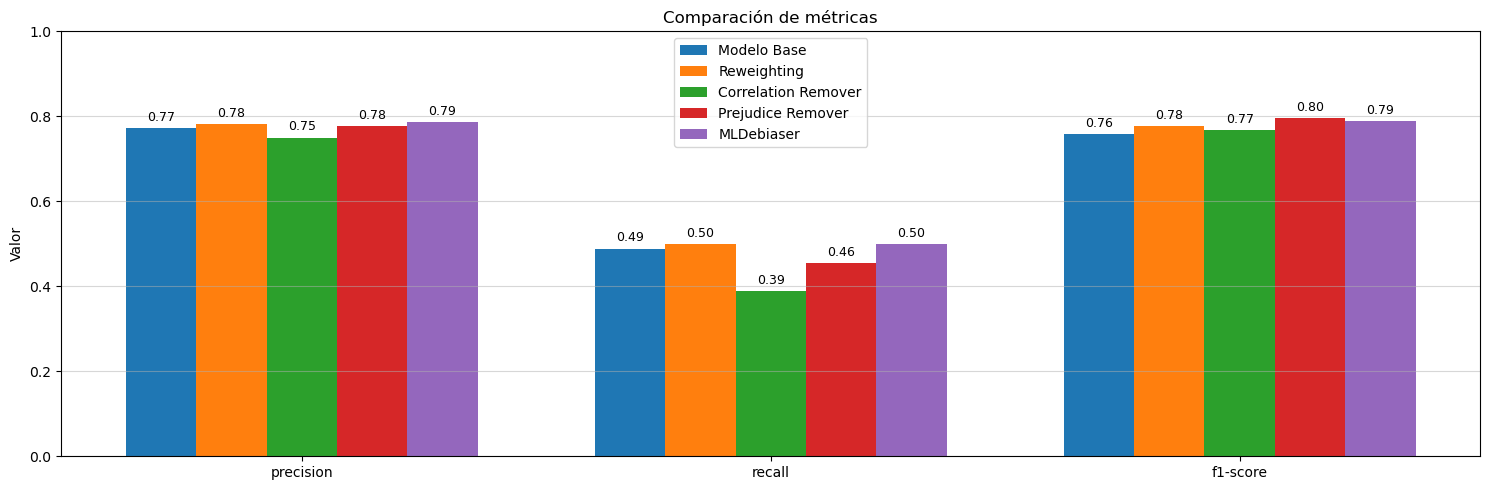

In [113]:

labels = ['precision', 'recall', 'f1-score']
clase = 'good (1)'
clase_bad = 'bad (0)'
report_base = classification_report(y_test, y_pred, target_names=["bad (0)", "good (1)"], output_dict=True, zero_division=0)
report_reweighting = classification_report(y_test, y_pred_weight, target_names=["bad (0)", "good (1)"], output_dict=True, zero_division=0)
report_corr = classification_report(y_test, y_pred_cr, target_names=["bad (0)", "good (1)"], output_dict=True, zero_division=0)
report_pr = classification_report(y_test, y_pred_pipeline_pr, target_names=["bad (0)", "good (1)"], output_dict=True, zero_division=0)
report_ml_debiaser = classification_report(y_test, y_pred_ml_debiaser, target_names=["bad (0)", "good (1)"], output_dict=True, zero_division=0)
values_base = [report_base[clase][metric] if metric != 'recall' else report_base[clase_bad]['recall'] for metric in labels]
values_w = [report_reweighting[clase][metric] if metric != 'recall' else report_reweighting[clase_bad]['recall'] for metric in labels]
values_corr = [report_corr[clase][metric] if metric != 'recall' else report_corr[clase_bad]['recall'] for metric in labels]
values_pr = [report_pr[clase][metric] if metric != 'recall' else report_pr[clase_bad]['recall'] for metric in labels]
values_ml_debiaser = [report_ml_debiaser[clase][metric] if metric != 'recall' else report_ml_debiaser[clase_bad]['recall'] for metric in labels]
x = np.arange(len(labels))
width = 0.15
plt.figure(figsize=(15, 5))
bars1 = plt.bar(x - 2*width, values_base, width, label='Modelo Base')
bars2 = plt.bar(x - width, values_w, width, label='Reweighting')
bars3 = plt.bar(x, values_corr, width, label='Correlation Remover')
bars4 = plt.bar(x + width, values_pr, width, label='Prejudice Remover')
bars5 = plt.bar(x + 2*width, values_ml_debiaser, width, label='MLDebiaser')

def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        plt.annotate(f'{height:.2f}',
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3), 
                     textcoords="offset points",
                     ha='center', va='bottom', fontsize=9)

for bars in [bars1, bars2, bars3, bars4, bars5]:
    autolabel(bars)

plt.xticks(x, labels)
plt.ylim(0, 1)
plt.ylabel('Valor')
plt.title('Comparación de métricas')
plt.legend()
plt.grid(axis='y', linestyle='-', alpha=0.5)
plt.tight_layout()
plt.show()

El `recall` que se muestra en el plot corresponde con la clase `bad`.

In [21]:

keys = [
    'Modelo Base',
    'Reweighting',
    'Correlation Remover',
    'Prejudice Remover',
    'MLDebiaser'
]

def get_metrics(y_true, y_pred, group_a, group_b):
    bias_metrics = classification_bias_metrics(
        group_a, group_b, y_pred, y_true, metric_type='both'
    )
    def get_metric_row(metric_name):
        row = bias_metrics.loc[metric_name]
        if isinstance(row, pd.Series):
            return row.iloc[0] if len(row) else np.nan
        return row
    sp = get_metric_row('Statistical Parity')
    eod = get_metric_row('Equality of Opportunity Difference')
    fprd = get_metric_row('False Positive Rate Difference')
    accd = get_metric_row('Accuracy Difference')
    report = classification_report(y_true, y_pred, target_names=["bad (0)", "good (1)"], output_dict=True, zero_division=0)
    precision_good = report['good (1)']['precision']
    recall_bad = report['bad (0)']['recall']
    return pd.Series({
        'Statistical Parity': sp,
        'Equality of Opportunity Difference': eod,
        'False Positive Rate Difference': fprd,
        'Accuracy Difference': accd,
        'Precision (good)': precision_good,
        'Recall (bad)': recall_bad
    })

metrics_base = get_metrics(y_test, y_pred, X_test['sex_male'], ~X_test['sex_male'])
metrics_w = get_metrics(y_test, y_pred_weight, X_test['sex_male'], ~X_test['sex_male'])
metrics_corr = get_metrics(y_test, y_pred_cr, X_test['sex_male'], ~X_test['sex_male'])
metrics_pr = get_metrics(y_test, y_pred_pipeline_pr, X_test['sex_male'], ~X_test['sex_male'])
metrics_ml_debiaser = get_metrics(y_test, y_pred_ml_debiaser, X_test['sex_male'], ~X_test['sex_male'])

comparison = pd.concat(
    [metrics_base, metrics_w, metrics_corr, metrics_pr, metrics_ml_debiaser],
    axis=1
)
comparison.columns = keys
comparison['Referencia'] = comparison['Modelo Base']

comparison

,Modelo Base,Reweighting,Correlation Remover,Prejudice Remover,MLDebiaser,Referencia
Statistical Parity,-0.018301,0.001307,0.000000,0.026144,-0.035294,-0.018301
Equality of Opportunity Difference,-0.098304,0.094875,0.071442,0.104591,-0.003048,-0.098304
False Positive Rate Difference,0.089527,-0.228041,-0.168919,-0.173986,-0.152027,0.089527
Accuracy Difference,-0.078431,0.158170,0.130719,0.151634,0.069281,-0.078431
Precision (good),0.772277,0.782609,0.750000,0.777273,0.786730,0.772277
Recall (bad),0.488889,0.500000,0.388889,0.455556,0.500000,0.488889


Luego de aplicar distintas técnicas de mitigación de sesgo al modelo base, se observa una mejora significativa en varias métricas de equidad sin comprometer de forma crítica el rendimiento del modelo.

- **`MLDebiaser`** resultó ser el método más *balanceado*, mejorando las métricas de justicia (especialmente *Equality of Opportunity* y *Accuracy Difference*) sin deteriorar el rendimiento predictivo. De hecho, mostró una leve mejora tanto en *precision* como en *recall*.

- **`Correlation Remover`** fue el más efectivo en términos de *paridad estadística absoluta*, logrando un valor exactamente nulo en *Statistical Parity Difference*. Sin embargo, esta mejora fue un *trade-off* con el descenso en el *recall*.

- **`Reweighting`** y **`Prejudice Remover`** mostraron buen desempeño en algunas métricas, pero tendieron a *sobrecompensar* el sesgo original, introduciendo diferencias negativas en tasas de falsos positivos o disminuyendo la calidad general del modelo.

---

**El objetivo principal es optimizar `Equalized Odds`**

Se prioriza minimizar tanto la diferencia en la **tasa de falsos positivos** como en la **tasa de verdaderos positivos** (*Equality of Opportunity*). Bajo este criterio, se observa que **`Prejudice Remover`** y **`MLDebiaser`** son los métodos que logran el mejor equilibrio.

---

**Próximos pasos**:

- *Explorar variantes del modelo base* (por ejemplo, `RandomForestClassifier` o `GradientBoostingClassifier`) para evaluar si se puede mantener o incluso mejorar la equidad sin sacrificar precisión.

- *Afinar hiperparámetros del mitigador*, en este caso `Prejudice Remover`, que si bien mostró buenos resultados, parece estar sobrecompensando el sesgo. Ajustar sus parámetros podría ayudar a lograr un mejor balance entre equidad y desempeño.
